In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.neighbors import NearestNeighbors
import math
%matplotlib inline

# Data exploration

In [2]:
df = pd.read_csv("../data/diabetes_prediction_dataset.csv")
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [4]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [5]:
pd.crosstab(df["gender"],df["diabetes"])

diabetes,0,1
gender,,
Female,54091,4461
Male,37391,4039
Other,18,0


In [6]:
df = df[df["gender"] != "Other"]


In [7]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [8]:
pd.crosstab(df["gender"],df["diabetes"])

diabetes,0,1
gender,,
Female,54091,4461
Male,37391,4039


In [9]:
54091/(54091+4461)*100 # 92.3 percent of women in the dataset have no diabetes

92.38113130209045

In [10]:
37391/(37391+4039)*100 # 90.2 percent of men in the dataset have no diabetes

90.25102582669562

In [11]:
4461/(4461+4039)*100 # 52.5 percent of those with diabetes are female

52.48235294117647

In [12]:
4039/(4461+4039)*100 # 47.5 percent of those with diabetes are female

47.51764705882353

(array([ 8980.,  7217.,  9679., 10366., 10618., 11666., 12133., 10755.,
         7873., 10695.]),
 array([ 0.08 ,  8.072, 16.064, 24.056, 32.048, 40.04 , 48.032, 56.024,
        64.016, 72.008, 80.   ]),
 <BarContainer object of 10 artists>)

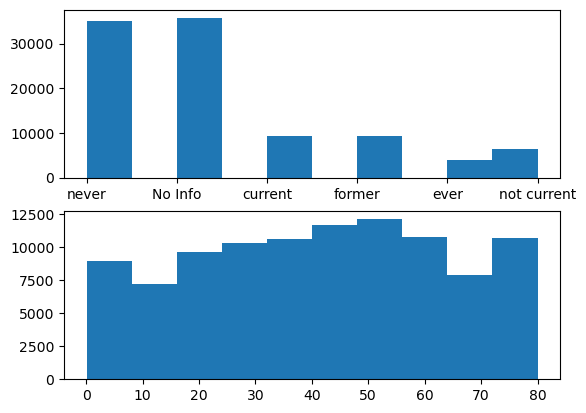

In [13]:
fig, ax = plt.subplots(nrows = 2, ncols = 1)
ax[0].hist(df["smoking_history"])
ax[1].hist(df["age"])

/tmp/ipykernel_4111/3028576344.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


<Axes: >

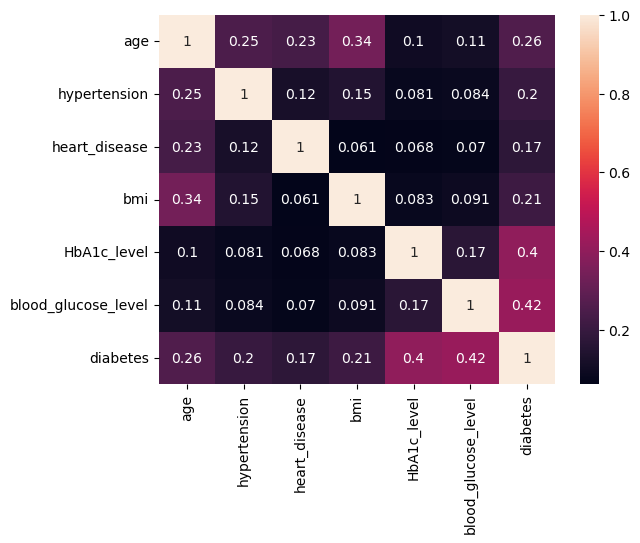

In [14]:
sns.heatmap(df.corr(), annot = True)

In [15]:
X = df.drop(["diabetes","gender","smoking_history"], axis = 1)
y = df["diabetes"]
#model = Pipeline([("encoder",OneHotEncoder()),('SGD',SGDClassifier())])
model = SGDClassifier()
scores = cross_val_score(model, X, y, cv = 3)
scores

array([0.93993039, 0.95775197, 0.95226093])

In [16]:
X = df.drop(["diabetes"], axis = 1)
y = df["diabetes"]

transform_columns = ["gender","smoking_history"]
transformer = ColumnTransformer([("OneHotEncoder", OneHotEncoder(), transform_columns)])
model = Pipeline([('transformer',transformer),('SGD',SGDClassifier())])
scores = cross_val_score(model, X, y, cv = 5)
scores

array([0.91498725, 0.91498725, 0.914983  , 0.914983  , 0.914983  ])

In [17]:
np.random.seed(42)
X = df.drop(["diabetes"], axis = 1)
y = df["diabetes"]

transform_columns = ["gender","smoking_history"]
transformer = ColumnTransformer([("OneHotEncoder", 
                                  OneHotEncoder(), 
                                  transform_columns)], 
                                  remainder = 'passthrough')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

X_train = transformer.fit_transform(X_train)
X_test = transformer.transform(X_test)
model = SGDClassifier()
model.fit(X_train, y_train)
y_preds = model.predict(X_test)
print(classification_report(y_true = y_test, y_pred = y_preds))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98     18222
           1       0.78      0.69      0.73      1775

    accuracy                           0.96     19997
   macro avg       0.88      0.84      0.86     19997
weighted avg       0.95      0.96      0.95     19997



In [18]:
#model needs better recall, too many false negatives so model is not accurate
#despite the score saying that it is a good model.

In [19]:
np.random.seed(42)
X = df.drop(["diabetes"], axis = 1)
y = df["diabetes"]

transform_columns = ["gender","smoking_history"]
transformer = ColumnTransformer([("OneHotEncoder", 
                                  OneHotEncoder(), 
                                  transform_columns)], 
                                  remainder = 'passthrough')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

X_train = transformer.fit_transform(X_train)
X_test = transformer.transform(X_test)
model = SGDClassifier()
model.fit(X_train, y_train)
y_preds = model.predict(X_test)
print(classification_report(y_true = y_test, y_pred = y_preds))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98     18222
           1       0.78      0.69      0.73      1775

    accuracy                           0.96     19997
   macro avg       0.88      0.84      0.86     19997
weighted avg       0.95      0.96      0.95     19997



In [20]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [21]:
df["smoking_history"].value_counts()

No Info        35810
never          35092
former          9352
current         9286
not current     6439
ever            4003
Name: smoking_history, dtype: int64

In [22]:
df.shape

(99982, 9)

(99982, 15)


<Axes: >

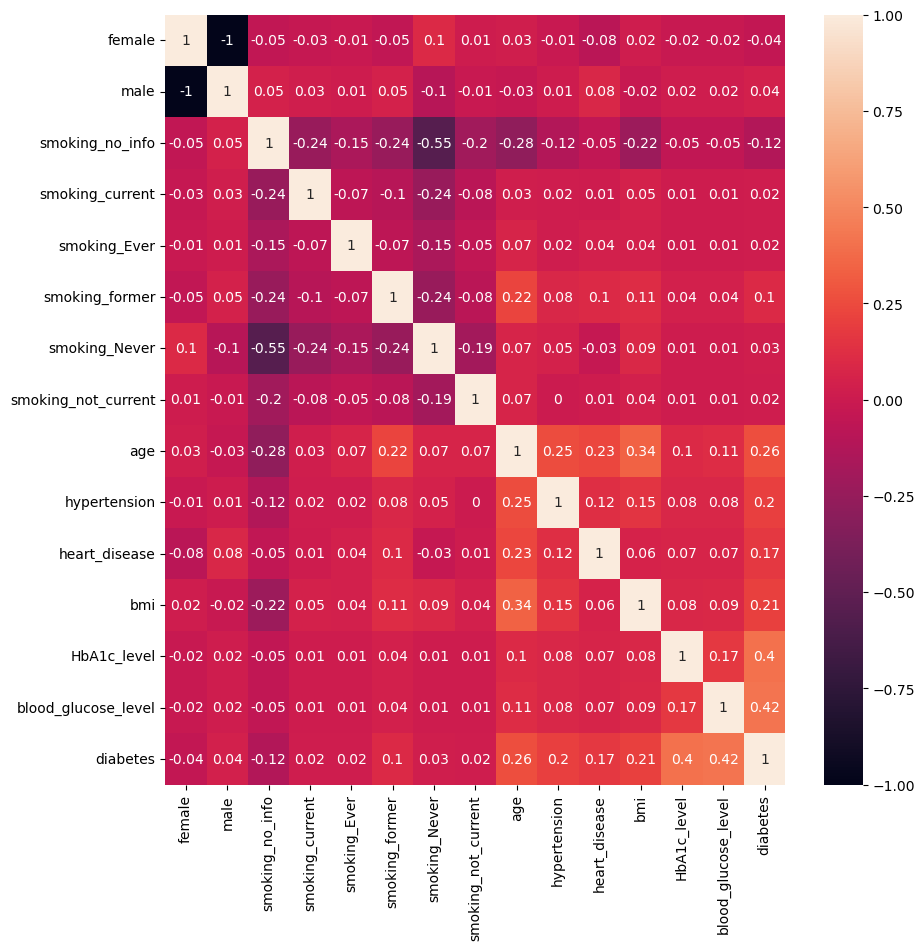

In [23]:
encoded_df = df.copy(deep = True)
EncodedColumns = ["female","male",
                  "smoking_no_info","smoking_current",
                  "smoking_Ever","smoking_former",
                  "smoking_Never","smoking_not_current",
                  "age","hypertension","heart_disease",
                  "bmi","HbA1c_level","blood_glucose_level","diabetes"]
transform_columns = ["gender","smoking_history"]
preprocessor = ColumnTransformer([("OneHotEncoder",
                                 OneHotEncoder(),
                                 transform_columns)],
                                 remainder = 'passthrough')

encoded_df = preprocessor.fit_transform(encoded_df)
print(encoded_df.shape)
#transform back into pandas dataframe
fig, ax = plt.subplots(figsize = (10,10))

encoded_df = pd.DataFrame(encoded_df, columns = EncodedColumns)
sns.heatmap(encoded_df.corr().round(2), annot = True)

In [24]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [25]:
feature_names = preprocessor.get_feature_names_out()
feature_names

array(['OneHotEncoder__gender_Female', 'OneHotEncoder__gender_Male',
       'OneHotEncoder__smoking_history_No Info',
       'OneHotEncoder__smoking_history_current',
       'OneHotEncoder__smoking_history_ever',
       'OneHotEncoder__smoking_history_former',
       'OneHotEncoder__smoking_history_never',
       'OneHotEncoder__smoking_history_not current', 'remainder__age',
       'remainder__hypertension', 'remainder__heart_disease',
       'remainder__bmi', 'remainder__HbA1c_level',
       'remainder__blood_glucose_level', 'remainder__diabetes'],
      dtype=object)

In [26]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [27]:
np.random.seed(42)
X = df.drop(["diabetes"], axis = 1)
y = df["diabetes"]

transform_columns = ["gender","smoking_history"]
le_gender = LabelEncoder()
le_smoke = LabelEncoder()

encoded_df = df.copy(deep = True)
encoded_df["gender"] = le_gender.fit_transform(encoded_df["gender"])
encoded_df["smoking_history"] = le_smoke.fit_transform(encoded_df["smoking_history"])
encoded_df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,0,27.32,6.2,90,0
99996,0,2.0,0,0,0,17.37,6.5,100,0
99997,1,66.0,0,0,3,27.83,5.7,155,0
99998,0,24.0,0,0,4,35.42,4.0,100,0


<Axes: >

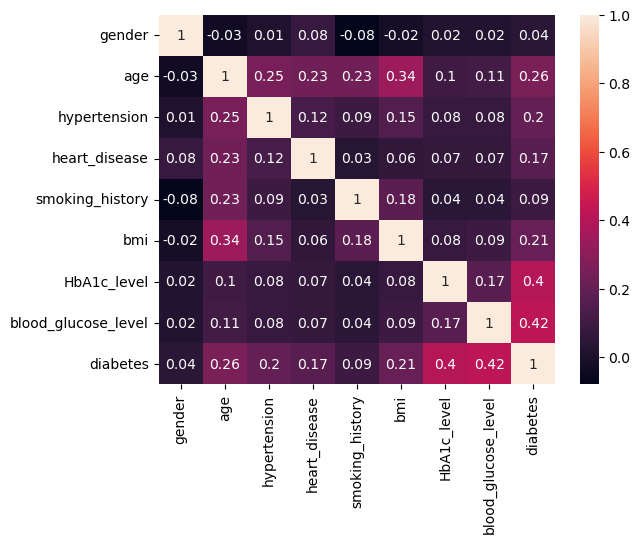

In [28]:
sns.heatmap(encoded_df.corr().round(2), annot = True)

In [29]:
print(le_gender.classes_)
print(le_smoke.classes_)

['Female' 'Male']
['No Info' 'current' 'ever' 'former' 'never' 'not current']


No Info = 0, current = 1, ever = 2, former = 3, never = 4, not current = 5

In [30]:
pd.crosstab(encoded_df["smoking_history"],encoded_df["diabetes"])

diabetes,0,1
smoking_history,,
0,34356,1454
1,8338,948
2,3531,472
3,7762,1590
4,31746,3346
5,5749,690


In [31]:
print("Percentage of no Info with diabetes =", 1454/(34356+1454)*100)
print("Percentage of current with diabetes =", 948/(8338+948)*100)
print("Percentage of ever with diabetes =", 475/(8338+472)*100)
print("Percentage of former with diabetes =", 1590/(7762+1590)*100)
print("Percentage of never with diabetes =", 3346/(31746+3346)*100)
print("Percentage of not current with diabetes =", 690/(5749+690)*100)
# No strong correlation between smoking and diabetes

Percentage of no Info with diabetes = 4.060318346830495
Percentage of current with diabetes = 10.208916648718501
Percentage of ever with diabetes = 5.391600454029512
Percentage of former with diabetes = 17.001710863986315
Percentage of never with diabetes = 9.534936737717999
Percentage of not current with diabetes = 10.715949681627581


In [32]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [33]:
X = df.drop(["diabetes"], axis = 1)
y = df["diabetes"]

transform_columns = ["gender","smoking_history"]
transformer = ColumnTransformer([("OneHotEncoder", 
                                  OneHotEncoder(), 
                                  transform_columns)], 
                                  remainder = 'passthrough')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

X_train = transformer.fit_transform(X_train)
X_test = transformer.transform(X_test)
model = SGDClassifier()
model.fit(X_train, y_train)
y_preds = model.predict(X_test)
print(classification_report(y_true = y_test, y_pred = y_preds))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98     18222
           1       0.78      0.69      0.73      1775

    accuracy                           0.96     19997
   macro avg       0.88      0.84      0.86     19997
weighted avg       0.95      0.96      0.95     19997



In [34]:
def cross_val_training_splits(dataset,cv = 5):
    "returns training splits for number of cross validations desired as a tuple"
    test_size = math.floor(((1/cv)*len(dataset)))
    dataset[:test_size]
    dataset[test_size:]
    splits = [[0,test_size],[test_size+1,test_size+test_size]]
    splits = np.array([])
    start = 0
    end = test_size
    for x in range(cv):
        if(x == cv-1):
            end = len(dataset)
            splits = np.append(splits,np.array([start,end]))
        else:
            splits = np.append(splits,np.array([start,end]))
            start = end
            end = end+test_size

    return splits
    
test_value = cross_val_training_splits(X, cv = 5)

In [35]:
test_value

array([    0., 19996., 19996., 39992., 39992., 59988., 59988., 79984.,
       79984., 99982.])

In [36]:
test_value[1]

19996.0

In [37]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [38]:

X = df.drop("diabetes", axis = 1)
y = df["diabetes"]

transformed_columns = ["gender","smoking_history"]
OneHotEncoderTransformer = ColumnTransformer(transformers = [("OneHotEncoder",
                                                              OneHotEncoder(),
                                                              transformed_columns)],
                                                              remainder = 'passthrough')

model = Pipeline(steps = [("Encoder",OneHotEncoderTransformer),("SGD",SGDClassifier())])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
y_preds = model.predict(X_test)
print(classification_report(y_true = y_test, y_pred = y_preds))

0.9581437215582337
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18229
           1       0.82      0.67      0.74      1768

    accuracy                           0.96     19997
   macro avg       0.90      0.83      0.86     19997
weighted avg       0.96      0.96      0.96     19997



In [39]:
#model with weights
X = df.drop("diabetes", axis = 1)
y = df["diabetes"]

transformed_columns = ["gender","smoking_history"]
OneHotEncoderTransformer = ColumnTransformer(transformers = [("OneHotEncoder",
                                                              OneHotEncoder(),
                                                              transformed_columns)],
                                                              remainder = 'passthrough')

model = Pipeline(steps = [("Encoder",OneHotEncoderTransformer),("SGD",SGDClassifier())])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
y_preds = model.predict(X_test)
print(classification_report(y_true = y_test, y_pred = y_preds))

0.951392708906336
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     18307
           1       0.97      0.44      0.60      1690

    accuracy                           0.95     19997
   macro avg       0.96      0.72      0.79     19997
weighted avg       0.95      0.95      0.94     19997



In [40]:
df["diabetes"].value_counts()

0    91482
1     8500
Name: diabetes, dtype: int64

In [41]:
test = df["diabetes"].value_counts()

In [42]:
test[0]

91482

In [43]:
91482/8500

10.762588235294118

In [44]:
X = df.drop("diabetes", axis = 1)
y = df["diabetes"]

transformed_columns = ["gender","smoking_history"]
OneHotEncoderTransformer = ColumnTransformer(transformers = [("OneHotEncoder",
                                                              OneHotEncoder(),
                                                              transformed_columns)],
                                                              remainder = 'passthrough')

SGD = Pipeline(steps = [("Encoder",OneHotEncoderTransformer),
                          ("SGD",SGDClassifier(class_weight = "balanced"))])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
SGDScores = cross_val_score(SGD, X, y, cv = 5)
SGDScores


array([0.81187178, 0.85127769, 0.92203441, 0.87232446, 0.83571714])

In [45]:
#model with weights
X = df.drop("diabetes", axis = 1)
y = df["diabetes"]

transformed_columns = ["gender","smoking_history"]
OneHotEncoderTransformer = ColumnTransformer(transformers = [("OneHotEncoder",
                                                              OneHotEncoder(),
                                                              transformed_columns)],
                                                              remainder = 'passthrough')

SGD = Pipeline(steps = [("Encoder",OneHotEncoderTransformer),
                          ("SGD",SGDClassifier(class_weight = "balanced"))])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
SGD.fit(X_train, y_train)
y_preds = SGD.predict(X_test)
SGDReport = classification_report(y_true = y_test, y_pred = y_preds)
predictions = SGD.predict(X_test)
print(recall_score(y_test, predictions))
print(SGDReport)

0.8211284513805522
              precision    recall  f1-score   support

           0       0.98      0.93      0.95     18331
           1       0.51      0.82      0.63      1666

    accuracy                           0.92     19997
   macro avg       0.75      0.87      0.79     19997
weighted avg       0.94      0.92      0.93     19997



In [46]:
X = df.drop("diabetes", axis = 1)
y = df["diabetes"]

transformed_columns = ["gender","smoking_history"]
OneHotEncoderTransformer = ColumnTransformer(transformers = [("OneHotEncoder",
                                                              OneHotEncoder(),
                                                              transformed_columns)],
                                                              remainder = 'passthrough')

LogReg = Pipeline(steps = [("Encoder",OneHotEncoderTransformer),
                          ("LogReg",LogisticRegression(class_weight = "balanced", max_iter = 200))])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
LogRegScores = cross_val_score(LogReg, X, y, cv = 5)
LogRegScores

/home/andy/miniconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/andy/miniconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

array([0.89033355, 0.8873331 , 0.88942789, 0.88767754, 0.88472695])

In [47]:
#model with weights
np.random.seed(42)
X = df.drop("diabetes", axis = 1)
y = df["diabetes"]

transformed_columns = ["gender","smoking_history"]
OneHotEncoderTransformer = ColumnTransformer(transformers = [("OneHotEncoder",
                                                              OneHotEncoder(),
                                                              transformed_columns)],
                                                              remainder = 'passthrough')

LogReg = Pipeline(steps = [("Encoder",OneHotEncoderTransformer),
                          ("LogReg",LogisticRegression(class_weight = "balanced", max_iter = 200))])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
LogReg.fit(X_train, y_train)
y_preds = LogReg.predict(X_test)
LogRegReport = classification_report(y_true = y_test, y_pred = y_preds)
predictions = LogReg.predict(X_test)
print(LogReg.score(X_test, y_test))
print(LogRegReport)

0.8904835725358804
              precision    recall  f1-score   support

           0       0.99      0.89      0.94     18222
           1       0.44      0.89      0.59      1775

    accuracy                           0.89     19997
   macro avg       0.71      0.89      0.76     19997
weighted avg       0.94      0.89      0.91     19997



/home/andy/miniconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [48]:
print(np.mean(SGDScores))
print(np.mean(LogRegScores))

0.8586450975247807
0.8878998032941589


In [49]:
print(SGDReport)
print(LogRegReport)

              precision    recall  f1-score   support

           0       0.98      0.93      0.95     18331
           1       0.51      0.82      0.63      1666

    accuracy                           0.92     19997
   macro avg       0.75      0.87      0.79     19997
weighted avg       0.94      0.92      0.93     19997

              precision    recall  f1-score   support

           0       0.99      0.89      0.94     18222
           1       0.44      0.89      0.59      1775

    accuracy                           0.89     19997
   macro avg       0.71      0.89      0.76     19997
weighted avg       0.94      0.89      0.91     19997



In [50]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [51]:
#lbfgs’, ‘liblinear’, ‘newton-cg’, ‘newton-cholesky’, ‘sag’, ‘saga’

In [52]:
 y_preds = LogReg.predict(X_test)
print(classification_report(y_true = y_test, y_pred = y_preds))

              precision    recall  f1-score   support

           0       0.99      0.89      0.94     18222
           1       0.44      0.89      0.59      1775

    accuracy                           0.89     19997
   macro avg       0.71      0.89      0.76     19997
weighted avg       0.94      0.89      0.91     19997



In [53]:
 y_preds = LogReg.predict(X_test)
print(classification_report(y_true = y_test, y_pred = y_preds))

              precision    recall  f1-score   support

           0       0.99      0.89      0.94     18222
           1       0.44      0.89      0.59      1775

    accuracy                           0.89     19997
   macro avg       0.71      0.89      0.76     19997
weighted avg       0.94      0.89      0.91     19997



In [54]:
 y_preds = LogReg.predict(X_test)
print(classification_report(y_true = y_test, y_pred = y_preds))

              precision    recall  f1-score   support

           0       0.99      0.89      0.94     18222
           1       0.44      0.89      0.59      1775

    accuracy                           0.89     19997
   macro avg       0.71      0.89      0.76     19997
weighted avg       0.94      0.89      0.91     19997



In [55]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [56]:
# Remove the imbalance of data in the dataset
diabetesData = df.copy()

In [57]:
diabetesData["diabetes"].value_counts()

0    91482
1     8500
Name: diabetes, dtype: int64

In [58]:
# Makes it so that only positive cases of diabetes are in the dataframe
#diabetesData = diabetesData[diabetesData["diabetes"] == 1]

In [59]:
len(diabetesData)

99982

In [60]:
np.random.seed(42)
def CreateBalancedDF(dataFrame,target):
    # Iterator
    Iterator = 0
    # Number of Iterations
    Iterations = dataFrame[target].value_counts()[1]
    #New dataframe that will be returned
    newDataFrame = dataFrame[dataFrame[target] == 1]
    #Drop rows equal to target value 1
    dataFrame = dataFrame[dataFrame[target] == 0]
    #Shuffle dataframe
    dataFrame = dataFrame.sample(frac = 1)
    #Append shuffled dataFrame
    newDataFrame = newDataFrame.append(dataFrame.head(len(newDataFrame)))
    #Shuffle new dataFrame
    newDataFrame = newDataFrame.sample(frac = 1)
    newDataFrame = newDataFrame.reset_index(drop=True)
    return newDataFrame
diabetesData = CreateBalancedDF(diabetesData, "diabetes");
diabetesData

/tmp/ipykernel_4111/1837343518.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDataFrame = newDataFrame.append(dataFrame.head(len(newDataFrame)))


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,71.0,0,0,former,19.04,4.8,200,0
1,Female,41.0,0,0,current,27.32,4.8,200,0
2,Male,70.0,0,0,not current,40.15,6.6,155,1
3,Female,39.0,0,0,never,26.09,3.5,90,0
4,Male,53.0,0,0,current,39.17,6.2,80,0
...,...,...,...,...,...,...,...,...,...
16995,Female,61.0,0,1,ever,31.63,6.5,200,1
16996,Female,80.0,0,0,No Info,27.32,6.5,240,1
16997,Female,39.0,1,0,never,32.39,6.0,300,1
16998,Male,19.0,0,0,never,22.07,6.6,145,1


In [61]:
diabetesData["diabetes"].value_counts()

0    8500
1    8500
Name: diabetes, dtype: int64

In [62]:
T, num_attrs = diabetesData.shape
print(T)
print(num_attrs)
print(diabetesData.shape)

17000
9
(17000, 9)


In [63]:
# Train new model with a balanced dataset
np.random.seed(42)
X = diabetesData.drop("diabetes", axis = 1)
y = diabetesData["diabetes"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

transformedColumns = ["gender","smoking_history"]

OneHotEncoderTransformer = ColumnTransformer(transformers = [("OneHotEncoder",
                                                             OneHotEncoder(),
                                                             transformedColumns)], 
                                                             remainder = 'passthrough')

rf_model = Pipeline(steps = [("Encoder",OneHotEncoderTransformer),
                             ("RandomForestClassifier",RandomForestClassifier())])

rf_model.fit(X_train, y_train)
y_preds = rf_model.predict(X_test)
rf_model_report = classification_report(y_true = y_test, y_pred = y_preds)
print(rf_model.score(X_test, y_test))
print(rf_model_report)

0.9052941176470588
              precision    recall  f1-score   support

           0       0.90      0.91      0.91      1699
           1       0.91      0.90      0.91      1701

    accuracy                           0.91      3400
   macro avg       0.91      0.91      0.91      3400
weighted avg       0.91      0.91      0.91      3400



Pretty good model, let's try to make it better with hyperparameter tuning

In [64]:
# Train new model with a balanced dataset
np.random.seed(42)
X = diabetesData.drop("diabetes", axis = 1)
y = diabetesData["diabetes"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

transformedColumns = ["gender","smoking_history"]

OneHotEncoderTransformer = ColumnTransformer(transformers = [("OneHotEncoder",
                                                             OneHotEncoder(),
                                                             transformedColumns)], 
                                                             remainder = 'passthrough')

param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
    'class_weight' : ["balanced"]
}

RandomForestModel = RandomizedSearchCV(estimator = RandomForestClassifier(), 
                                        param_distributions = param_grid, 
                                        n_iter = 1000, 
                                        n_jobs = -1)

rf_model_tuned = Pipeline(steps = [("Encoder",OneHotEncoderTransformer),
                             ("RandomForestClassifier",RandomForestModel)])

rf_model_tuned.fit(X_train, y_train)
y_preds = rf_model_tuned.predict(X_test)
rf_model_report_tuned = classification_report(y_true = y_test, y_pred = y_preds)
print(rf_model_tuned.score(X_test, y_test))
print(rf_model_report_tuned)

/home/andy/miniconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 108 is smaller than n_iter=1000. Running 108 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


0.9008823529411765
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      1699
           1       0.91      0.88      0.90      1701

    accuracy                           0.90      3400
   macro avg       0.90      0.90      0.90      3400
weighted avg       0.90      0.90      0.90      3400



In [65]:
# Train new model with a balanced dataset
np.random.seed(42)
X = diabetesData.drop("diabetes", axis = 1)
y = diabetesData["diabetes"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

transformedColumns = ["gender","smoking_history"]

OneHotEncoderTransformer = ColumnTransformer(transformers = [("OneHotEncoder",
                                                             OneHotEncoder(),
                                                             transformedColumns)], 
                                                             remainder = 'passthrough')

param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
    'class_weight' : ["balanced"]
}

RandomForestModel = RandomizedSearchCV(estimator = RandomForestClassifier(), 
                                        param_distributions = param_grid, 
                                        n_iter = 1000, 
                                        n_jobs = -1)

rf_model_tuned = Pipeline(steps = [("Encoder",OneHotEncoderTransformer),
                                    ("minMaxScaling",MinMaxScaler()),
                                   ("RandomForestClassifier",RandomForestModel)])

rf_model_tuned.fit(X_train, y_train)
y_preds = rf_model_tuned.predict(X_test)
rf_model_report_tuned = classification_report(y_true = y_test, y_pred = y_preds)
print(rf_model_tuned.score(X_test, y_test))
print(rf_model_report_tuned)

/home/andy/miniconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 108 is smaller than n_iter=1000. Running 108 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


0.9014705882352941
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      1699
           1       0.91      0.89      0.90      1701

    accuracy                           0.90      3400
   macro avg       0.90      0.90      0.90      3400
weighted avg       0.90      0.90      0.90      3400



In [66]:
diabetesData["diabetes"].value_counts()

0    8500
1    8500
Name: diabetes, dtype: int64

In [67]:
# Train new model with a balanced dataset
np.random.seed(42)
X = diabetesData.drop("diabetes", axis = 1)
y = diabetesData["diabetes"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

transformedColumns = ["gender","smoking_history"]

OneHotEncoderTransformer = ColumnTransformer(transformers = [("OneHotEncoder",
                                                             OneHotEncoder(),
                                                             transformedColumns)], 
                                                             remainder = 'passthrough')

param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
    'class_weight' : ["balanced"]
}

RandomForestModel = GridSearchCV(estimator = RandomForestClassifier(), 
                                 param_grid = param_grid, 
                                 n_jobs = -1)

rf_model_tuned = Pipeline(steps = [("Encoder",OneHotEncoderTransformer),
                             ("RandomForestClassifier",RandomForestModel)])

rf_model_tuned.fit(X_train, y_train)
y_preds = rf_model_tuned.predict(X_test)
rf_model_report_tuned = classification_report(y_true = y_test, y_pred = y_preds)
print(rf_model_tuned.score(X_test, y_test))
print(rf_model_report_tuned)

0.9011764705882352
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      1699
           1       0.91      0.88      0.90      1701

    accuracy                           0.90      3400
   macro avg       0.90      0.90      0.90      3400
weighted avg       0.90      0.90      0.90      3400



In [68]:
rf_model_tuned.get_params(deep = True)

{'memory': None,
 'steps': [('Encoder',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('OneHotEncoder', OneHotEncoder(),
                                    ['gender', 'smoking_history'])])),
  ('RandomForestClassifier',
   GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
                param_grid={'class_weight': ['balanced'], 'max_depth': [3, 6, 9],
                            'max_features': ['sqrt', 'log2', None],
                            'max_leaf_nodes': [3, 6, 9],
                            'n_estimators': [25, 50, 100, 150]}))],
 'verbose': False,
 'Encoder': ColumnTransformer(remainder='passthrough',
                   transformers=[('OneHotEncoder', OneHotEncoder(),
                                  ['gender', 'smoking_history'])]),
 'RandomForestClassifier': GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
              param_grid={'class_weight': ['balanced'], 'max_depth': [3, 6, 9],
                          'ma

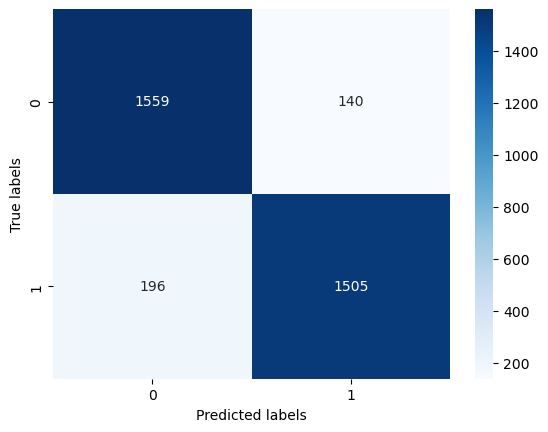

In [69]:
cm = confusion_matrix(y_test, y_preds)

# Plot confusion matrix with seaborn heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt="d")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [70]:
print(rf_model_report)
print(rf_model_report_tuned)
print(RandomForestClassifier().get_params())
print()
print(RandomForestModel.best_params_)

              precision    recall  f1-score   support

           0       0.90      0.91      0.91      1699
           1       0.91      0.90      0.91      1701

    accuracy                           0.91      3400
   macro avg       0.91      0.91      0.91      3400
weighted avg       0.91      0.91      0.91      3400

              precision    recall  f1-score   support

           0       0.89      0.92      0.90      1699
           1       0.91      0.88      0.90      1701

    accuracy                           0.90      3400
   macro avg       0.90      0.90      0.90      3400
weighted avg       0.90      0.90      0.90      3400

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_st

Original data:
    age  income  Female  Male
0   25   50000.0     0.0   1.0
1   30   60000.0     1.0   0.0
2   20   40000.0     0.0   1.0
3   35   70000.0     1.0   0.0

Encoded data:
    Female  Male
0     0.0   1.0
1     1.0   0.0
2     0.0   1.0
3     1.0   0.0

Scaled data:
    age    income  Female  Male
0  0.25  0.285714     0.0   1.0
1  0.50  0.428571     1.0   0.0
2  0.00  0.000000     0.0   1.0
3  1.00  1.000000     1.0   0.0


In [71]:
diabetesData.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,71.0,0,0,former,19.04,4.8,200,0
1,Female,41.0,0,0,current,27.32,4.8,200,0
2,Male,70.0,0,0,not current,40.15,6.6,155,1
3,Female,39.0,0,0,never,26.09,3.5,90,0
4,Male,53.0,0,0,current,39.17,6.2,80,0


In [72]:
X = diabetesData.drop("diabetes", axis = 1)
y = diabetesData["diabetes"]
print(X)
print(y)

       gender   age  hypertension  heart_disease smoking_history    bmi  \
0      Female  71.0             0              0          former  19.04   
1      Female  41.0             0              0         current  27.32   
2        Male  70.0             0              0     not current  40.15   
3      Female  39.0             0              0           never  26.09   
4        Male  53.0             0              0         current  39.17   
...       ...   ...           ...            ...             ...    ...   
16995  Female  61.0             0              1            ever  31.63   
16996  Female  80.0             0              0         No Info  27.32   
16997  Female  39.0             1              0           never  32.39   
16998    Male  19.0             0              0           never  22.07   
16999    Male  65.0             1              0           never  27.32   

       HbA1c_level  blood_glucose_level  
0              4.8                  200  
1              

In [73]:
diabetesData.columns, type(np.array(diabetesData.columns))

(Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
        'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
       dtype='object'),
 numpy.ndarray)

### Preprocessing

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
#Encode the data
columns = ["gender","smoking_history"]
columnTransformer = ColumnTransformer(transformers = [("oneHotEncoder",
                                                       OneHotEncoder(),
                                                       columns)],
                                                       remainder = 'passthrough')

preprocessor = Pipeline(steps = [("encoder",columnTransformer),
                                  ("minMaxScaling",MinMaxScaler())])

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

feature_names = preprocessor.get_feature_names_out()
X_train = pd.DataFrame(X_train, columns = feature_names)
X_test = pd.DataFrame(X_test, columns = feature_names)

### Train the model

In [75]:
def ModelReport(model, X_train, X_test, y_train, y_test):
    y_preds = model.predict(X_test)
    model_report = classification_report(y_true = y_test, y_pred = y_preds)
    print(model_report)
    print("model score",model.score(X_test, y_test))
    print("f1 score",f1_score(y_true = y_test, y_pred = y_preds))
    print("precision score",precision_score(y_true = y_test, y_pred = y_preds))
    print("recall score",recall_score(y_true = y_test, y_pred = y_preds))
    print()
    return f1_score(y_true = y_test, y_pred = y_preds)

In [76]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
ModelReport(rf_model, X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.91      0.90      0.91      1688
           1       0.90      0.91      0.91      1712

    accuracy                           0.91      3400
   macro avg       0.91      0.91      0.91      3400
weighted avg       0.91      0.91      0.91      3400

model score 0.9067647058823529
f1 score 0.9080893012467383
precision score 0.9015544041450777
recall score 0.9147196261682243



0.9080893012467383

# Synthetic Minority Over-sampling
1. Split the data
2. Scale the data
3. Find nearest neighbors
4. Calculate difference from nearest neighbors
5. Randomly multiple the difference by a random number between 0 and 1 and add that to the original vector.
6. Done new point created!'

In [77]:
# Split data
X = df.drop("diabetes", axis = 1)
y = df["diabetes"]
print(X)
print(y)

       gender   age  hypertension  heart_disease smoking_history    bmi  \
0      Female  80.0             0              1           never  25.19   
1      Female  54.0             0              0         No Info  27.32   
2        Male  28.0             0              0           never  27.32   
3      Female  36.0             0              0         current  23.45   
4        Male  76.0             1              1         current  20.14   
...       ...   ...           ...            ...             ...    ...   
99995  Female  80.0             0              0         No Info  27.32   
99996  Female   2.0             0              0         No Info  17.37   
99997    Male  66.0             0              0          former  27.83   
99998  Female  24.0             0              0           never  35.42   
99999  Female  57.0             0              0         current  22.43   

       HbA1c_level  blood_glucose_level  
0              6.6                  140  
1              

In [78]:
# Preprocessing and scaling the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
#Encode the data
columns = ["gender","smoking_history"]
columnTransformer = ColumnTransformer(transformers = [("oneHotEncoder",
                                                       OneHotEncoder(),
                                                       columns)],
                                                       remainder = 'passthrough')

preprocessor = Pipeline(steps = [("encoder",columnTransformer),
                                  ("minMaxScaling",MinMaxScaler())])

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

feature_names = preprocessor.get_feature_names_out()
X_train = pd.DataFrame(X_train, columns = feature_names)
X_test = pd.DataFrame(X_test, columns = feature_names)

In [79]:
smote = SMOTE(sampling_strategy='minority', k_neighbors=5)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [80]:
'''
param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
    'class_weight' : ["balanced"]
}

rf_model_tuned = GridSearchCV(estimator = RandomForestClassifier(), 
                                 param_grid = param_grid, 
                                 n_jobs = -1)
rf_model_tuned.fit(X_train_resampled, y_train_resampled)
ModelReport(rf_model_tuned, X_train_resampled, X_test, y_train_resampled, y_test)
'''

'\nparam_grid = {\n    \'n_estimators\': [25, 50, 100, 150],\n    \'max_features\': [\'sqrt\', \'log2\', None],\n    \'max_depth\': [3, 6, 9],\n    \'max_leaf_nodes\': [3, 6, 9],\n    \'class_weight\' : ["balanced"]\n}\n\nrf_model_tuned = GridSearchCV(estimator = RandomForestClassifier(), \n                                 param_grid = param_grid, \n                                 n_jobs = -1)\nrf_model_tuned.fit(X_train_resampled, y_train_resampled)\nModelReport(rf_model_tuned, X_train_resampled, X_test, y_train_resampled, y_test)\n'

In [81]:
smote = SMOTE(sampling_strategy='minority', k_neighbors=5)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
rf_model = RandomForestClassifier()
rf_model.fit(X_train_resampled, y_train_resampled)
ModelReport(rf_model, X_train_resampled, X_test, y_train_resampled, y_test)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     18288
           1       0.74      0.75      0.75      1709

    accuracy                           0.96     19997
   macro avg       0.86      0.86      0.86     19997
weighted avg       0.96      0.96      0.96     19997

model score 0.9560434065109766
f1 score 0.7452912199362502
precision score 0.7382319173363949
recall score 0.7524868344060854



0.7452912199362502

In [82]:
diabetesData["diabetes"].value_counts()

0    8500
1    8500
Name: diabetes, dtype: int64

In [83]:
'''
# Comment this out later
# Train new model with a balanced dataset
np.random.seed(42)
X = df.drop("diabetes", axis = 1)
y = df["diabetes"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

transformedColumns = ["gender","smoking_history"]

OneHotEncoderTransformer = ColumnTransformer(transformers = [("OneHotEncoder",
                                                             OneHotEncoder(),
                                                             transformedColumns)], 
                                                             remainder = 'passthrough')

param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
    'class_weight' : ["balanced"]
}

rf_model_tuned = RandomizedSearchCV(estimator = RandomForestClassifier(), 
                                        param_distributions = param_grid, 
                                        n_iter = 1000, 
                                        n_jobs = -1)

preprocessor = Pipeline(steps = [("Encoder",OneHotEncoderTransformer),
                                    ("minMaxScaling",MinMaxScaler())])

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

smote = SMOTE(sampling_strategy='minority', k_neighbors=5)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
rf_model_tuned.fit(X_train_resampled, y_train_resampled)

y_preds = rf_model_tuned.predict(X_test)
rf_model_report_tuned = classification_report(y_true = y_test, y_pred = y_preds)
print(rf_model_tuned.score(X_test, y_test))
print(rf_model_report_tuned)
'''

'\n# Comment this out later\n# Train new model with a balanced dataset\nnp.random.seed(42)\nX = df.drop("diabetes", axis = 1)\ny = df["diabetes"]\n\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)\n\ntransformedColumns = ["gender","smoking_history"]\n\nOneHotEncoderTransformer = ColumnTransformer(transformers = [("OneHotEncoder",\n                                                             OneHotEncoder(),\n                                                             transformedColumns)], \n                                                             remainder = \'passthrough\')\n\nparam_grid = {\n    \'n_estimators\': [25, 50, 100, 150],\n    \'max_features\': [\'sqrt\', \'log2\', None],\n    \'max_depth\': [3, 6, 9],\n    \'max_leaf_nodes\': [3, 6, 9],\n    \'class_weight\' : ["balanced"]\n}\n\nrf_model_tuned = RandomizedSearchCV(estimator = RandomForestClassifier(), \n                                        param_distributions = param_grid, \n            

In [84]:
score = 0
best_score = 0
location = 0
for x in range(1,101,2):
    smote = SMOTE(sampling_strategy='minority', k_neighbors=x)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
    rf_model = RandomForestClassifier(n_jobs = -1)
    rf_model.fit(X_train_resampled, y_train_resampled)
    score = ModelReport(rf_model, X_train_resampled, X_test, y_train_resampled, y_test)
    if score > best_score:
        best_score = score
        location = x
print("best f1_score was",best_score)
print("at x = ",location)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18288
           1       0.82      0.73      0.77      1709

    accuracy                           0.96     19997
   macro avg       0.90      0.86      0.88     19997
weighted avg       0.96      0.96      0.96     19997

model score 0.9633445016752513
f1 score 0.772572137759851
precision score 0.8223249669749009
recall score 0.7284961966062025

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     18288
           1       0.76      0.74      0.75      1709

    accuracy                           0.96     19997
   macro avg       0.87      0.86      0.86     19997
weighted avg       0.96      0.96      0.96     19997

model score 0.9576936540481072
f1 score 0.7501476668635558
precision score 0.7573047107930829
recall score 0.743124634289058

              precision    recall  f1-score   support

           0       0.98      0.98      

              precision    recall  f1-score   support

           0       0.98      0.97      0.97     18288
           1       0.71      0.76      0.74      1709

    accuracy                           0.95     19997
   macro avg       0.85      0.87      0.86     19997
weighted avg       0.96      0.95      0.95     19997

model score 0.9537430614592188
f1 score 0.7386267307148912
precision score 0.7142076502732241
recall score 0.764774722059684

              precision    recall  f1-score   support

           0       0.98      0.97      0.97     18288
           1       0.70      0.77      0.73      1709

    accuracy                           0.95     19997
   macro avg       0.84      0.87      0.85     19997
weighted avg       0.95      0.95      0.95     19997

model score 0.9520928139220883
f1 score 0.732102908277405
precision score 0.7011247991430102
recall score 0.7659449970743125

              precision    recall  f1-score   support

           0       0.98      0.97      

              precision    recall  f1-score   support

           0       0.98      0.97      0.97     18288
           1       0.71      0.77      0.74      1709

    accuracy                           0.95     19997
   macro avg       0.85      0.87      0.86     19997
weighted avg       0.96      0.95      0.95     19997

model score 0.9538430764614693
f1 score 0.7393391697260662
precision score 0.7145196506550219
recall score 0.7659449970743125

              precision    recall  f1-score   support

           0       0.98      0.97      0.97     18288
           1       0.72      0.76      0.74      1709

    accuracy                           0.95     19997
   macro avg       0.85      0.87      0.86     19997
weighted avg       0.96      0.95      0.95     19997

model score 0.9536430464569685
f1 score 0.7370212765957448
precision score 0.7153083700440529
recall score 0.7600936220011703

              precision    recall  f1-score   support

           0       0.98      0.97    

In [85]:
round(len(X_train_resampled))

146388

In [86]:
smote = SMOTE(sampling_strategy='minority', k_neighbors= round(np.sqrt(len(X_train_resampled))))
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
rf_model = RandomForestClassifier()
rf_model.fit(X_train_resampled, y_train_resampled)
ModelReport(rf_model, X_train_resampled, X_test, y_train_resampled, y_test)


              precision    recall  f1-score   support

           0       0.98      0.98      0.98     18288
           1       0.79      0.73      0.76      1709

    accuracy                           0.96     19997
   macro avg       0.88      0.86      0.87     19997
weighted avg       0.96      0.96      0.96     19997

model score 0.9604440666099915
f1 score 0.759793501366535
precision score 0.7897727272727273
recall score 0.7320070216500878



0.759793501366535

In [87]:
# Train new model with a balanced dataset
np.random.seed(42)
X = diabetesData.drop("diabetes", axis = 1)
y = diabetesData["diabetes"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

transformedColumns = ["gender","smoking_history"]

OneHotEncoderTransformer = ColumnTransformer(transformers = [("OneHotEncoder",
                                                             OneHotEncoder(),
                                                             transformedColumns)], 
                                                             remainder = 'passthrough')

param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
    'class_weight' : ["balanced"]
}

RandomForestModel = RandomizedSearchCV(estimator = RandomForestClassifier(), 
                                        param_distributions = param_grid, 
                                        n_iter = 100, 
                                        n_jobs = -1)

rf_model_tuned = Pipeline(steps = [("Encoder",OneHotEncoderTransformer),
                                    ("minMaxScaling",MinMaxScaler()),
                                   ("RandomForestClassifier",RandomForestModel)])

rf_model_tuned.fit(X_train, y_train)
y_preds = rf_model_tuned.predict(X_test)
rf_model_report_tuned = classification_report(y_true = y_test, y_pred = y_preds)
print(rf_model_tuned.score(X_test, y_test))
print(rf_model_report_tuned)

0.9
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      1699
           1       0.91      0.89      0.90      1701

    accuracy                           0.90      3400
   macro avg       0.90      0.90      0.90      3400
weighted avg       0.90      0.90      0.90      3400



In [88]:
df.max()

gender                        Male
age                           80.0
hypertension                     1
heart_disease                    1
smoking_history        not current
bmi                          95.69
HbA1c_level                    9.0
blood_glucose_level            300
diabetes                         1
dtype: object

In [89]:
diabetesData.max()

gender                        Male
age                           80.0
hypertension                     1
heart_disease                    1
smoking_history        not current
bmi                          95.22
HbA1c_level                    9.0
blood_glucose_level            300
diabetes                         1
dtype: object

In [90]:
diabetesData["bmi"].quantile(0.95)

43.59

In [91]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,99982.000000,99982.000000,99982.000000,99982.000000,99982.000000,99982.000000,99982.000000
mean,41.888076,0.074863,0.039427,27.320757,5.527529,138.057810,0.085015
std,22.517206,0.263172,0.194610,6.636853,1.070665,40.709469,0.278906
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.000000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


In [92]:
len(df[df["bmi"] > 55].value_counts())

309

In [93]:
diabetesData

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,71.0,0,0,former,19.04,4.8,200,0
1,Female,41.0,0,0,current,27.32,4.8,200,0
2,Male,70.0,0,0,not current,40.15,6.6,155,1
3,Female,39.0,0,0,never,26.09,3.5,90,0
4,Male,53.0,0,0,current,39.17,6.2,80,0
...,...,...,...,...,...,...,...,...,...
16995,Female,61.0,0,1,ever,31.63,6.5,200,1
16996,Female,80.0,0,0,No Info,27.32,6.5,240,1
16997,Female,39.0,1,0,never,32.39,6.0,300,1
16998,Male,19.0,0,0,never,22.07,6.6,145,1


In [94]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [95]:
# Try feature engineering techniques
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [96]:
df.corr()

/tmp/ipykernel_4111/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
age,1.000000,0.251163,0.233352,0.337378,0.101343,0.110679,0.257999
hypertension,0.251163,1.000000,0.121253,0.147679,0.080941,0.084436,0.197811
heart_disease,0.233352,0.121253,1.000000,0.061203,0.067591,0.070071,0.171718
bmi,0.337378,0.147679,0.061203,1.000000,0.083017,0.091310,0.214377
HbA1c_level,0.101343,0.080941,0.067591,0.083017,1.000000,0.166831,0.400696
blood_glucose_level,0.110679,0.084436,0.070071,0.091310,0.166831,1.000000,0.419587
diabetes,0.257999,0.197811,0.171718,0.214377,0.400696,0.419587,1.000000


/tmp/ipykernel_4111/2224689551.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


<Axes: >

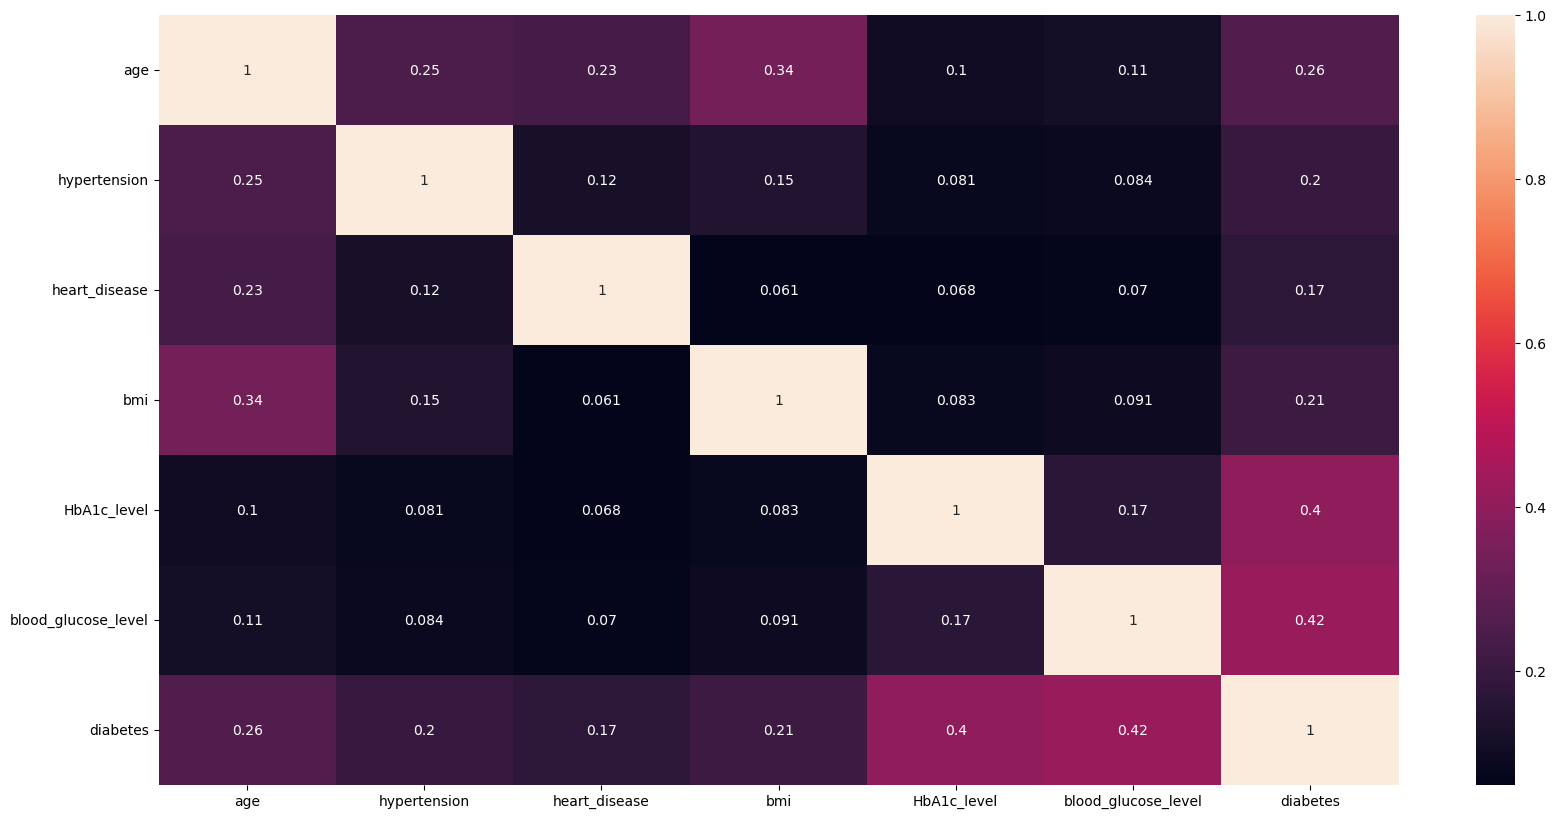

In [97]:
fig, ax = plt.subplots(figsize = (20,10))
sns.heatmap(df.corr(), annot = True)

<Axes: >

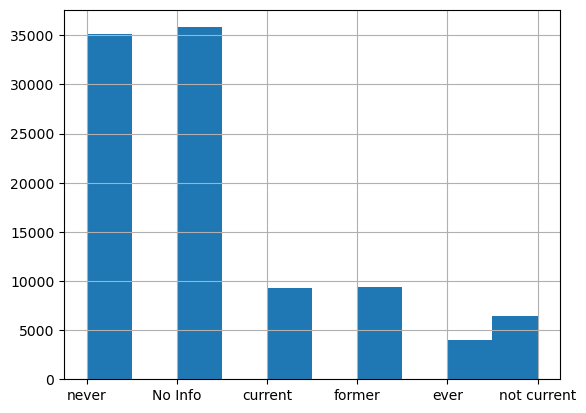

In [98]:
df['smoking_history'].hist()

In [99]:
df_processed = df.copy(deep = True)

In [100]:
diabetesData

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,71.0,0,0,former,19.04,4.8,200,0
1,Female,41.0,0,0,current,27.32,4.8,200,0
2,Male,70.0,0,0,not current,40.15,6.6,155,1
3,Female,39.0,0,0,never,26.09,3.5,90,0
4,Male,53.0,0,0,current,39.17,6.2,80,0
...,...,...,...,...,...,...,...,...,...
16995,Female,61.0,0,1,ever,31.63,6.5,200,1
16996,Female,80.0,0,0,No Info,27.32,6.5,240,1
16997,Female,39.0,1,0,never,32.39,6.0,300,1
16998,Male,19.0,0,0,never,22.07,6.6,145,1


In [101]:
# Train new model with a balanced dataset
np.random.seed(42)
X = diabetesData.drop(["diabetes","smoking_history"], axis = 1)
y = diabetesData["diabetes"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

transformedColumns = ["gender"]

OneHotEncoderTransformer = ColumnTransformer(transformers = [("OneHotEncoder",
                                                             OneHotEncoder(),
                                                             transformedColumns)], 
                                                             remainder = 'passthrough')

param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
    'class_weight' : ["balanced"]
}

RandomForestModel = RandomizedSearchCV(estimator = RandomForestClassifier(), 
                                        param_distributions = param_grid, 
                                        n_iter = 100, 
                                        n_jobs = 12)

rf_model_tuned = Pipeline(steps = [("Encoder",OneHotEncoderTransformer),
                                    ("StandardScaler",StandardScaler()),
                                   ("RandomForestClassifier",RandomForestModel)])

rf_model_tuned.fit(X_train, y_train)
y_preds = rf_model_tuned.predict(X_test)
rf_model_report_tuned = classification_report(y_true = y_test, y_pred = y_preds)
print(rf_model_tuned.score(X_test, y_test))
print(rf_model_report_tuned)

0.9008823529411765
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      1699
           1       0.92      0.88      0.90      1701

    accuracy                           0.90      3400
   macro avg       0.90      0.90      0.90      3400
weighted avg       0.90      0.90      0.90      3400



In [102]:
# Train new model with a balanced dataset
np.random.seed(42)
X = diabetesData.drop(["diabetes","smoking_history"], axis = 1)
y = diabetesData["diabetes"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

transformedColumns = ["gender"]

OneHotEncoderTransformer = ColumnTransformer(transformers = [("OneHotEncoder",
                                                             OneHotEncoder(),
                                                             transformedColumns)], 
                                                             remainder = 'passthrough')

param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
    'class_weight' : ["balanced"]
}

RandomForestModel = RandomizedSearchCV(estimator = RandomForestClassifier(), 
                                        param_distributions = param_grid, 
                                        n_iter = 100, 
                                        n_jobs = 12)

rf_model_tuned = Pipeline(steps = [("Encoder",OneHotEncoderTransformer),
                                    ("MinMaxScaler",MinMaxScaler()),
                                   ("RandomForestClassifier",RandomForestModel)])

rf_model_tuned.fit(X_train, y_train)
y_preds = rf_model_tuned.predict(X_test)
rf_model_report_tuned = classification_report(y_true = y_test, y_pred = y_preds)
print(rf_model_tuned.score(X_test, y_test))
print(rf_model_report_tuned)

0.8976470588235295
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      1699
           1       0.92      0.87      0.90      1701

    accuracy                           0.90      3400
   macro avg       0.90      0.90      0.90      3400
weighted avg       0.90      0.90      0.90      3400



In [103]:
# Train new model with a balanced dataset
np.random.seed(42)
X = diabetesData.drop(["diabetes","smoking_history"], axis = 1)
y = diabetesData["diabetes"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

transformedColumns = ["gender"]

OneHotEncoderTransformer = ColumnTransformer(transformers = [("OneHotEncoder",
                                                             OneHotEncoder(),
                                                             transformedColumns)], 
                                                             remainder = 'passthrough')

param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
    'class_weight' : ["balanced"]
}

RandomForestModel = RandomizedSearchCV(estimator = RandomForestClassifier(), 
                                        param_distributions = param_grid, 
                                        n_iter = 100, 
                                        n_jobs = 12)

rf_model_tuned = Pipeline(steps = [("Encoder",OneHotEncoderTransformer),
                                   ("RandomForestClassifier",RandomForestModel)])

rf_model_tuned.fit(X_train, y_train)
y_preds = rf_model_tuned.predict(X_test)
rf_model_report_tuned = classification_report(y_true = y_test, y_pred = y_preds)
print(rf_model_tuned.score(X_test, y_test))
print(rf_model_report_tuned)

0.8976470588235295
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      1699
           1       0.92      0.87      0.90      1701

    accuracy                           0.90      3400
   macro avg       0.90      0.90      0.90      3400
weighted avg       0.90      0.90      0.90      3400



In [104]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


<Axes: >

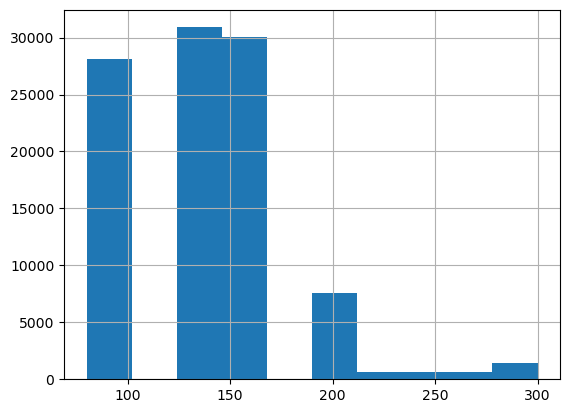

In [105]:
df['blood_glucose_level'].hist()

<Axes: >

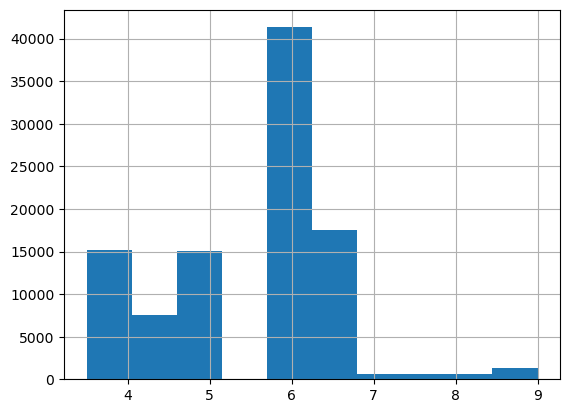

In [106]:
df['HbA1c_level'].hist()

<Axes: >

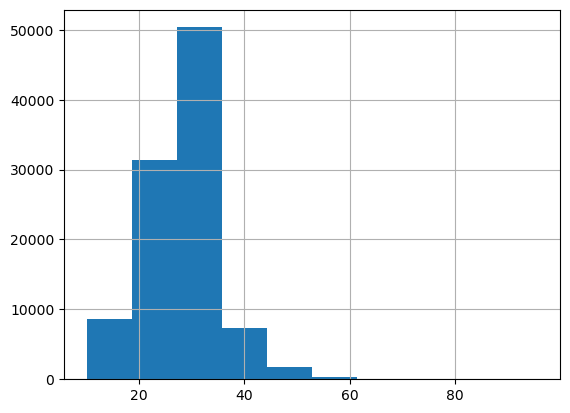

In [107]:
df['bmi'].hist()

<Axes: >

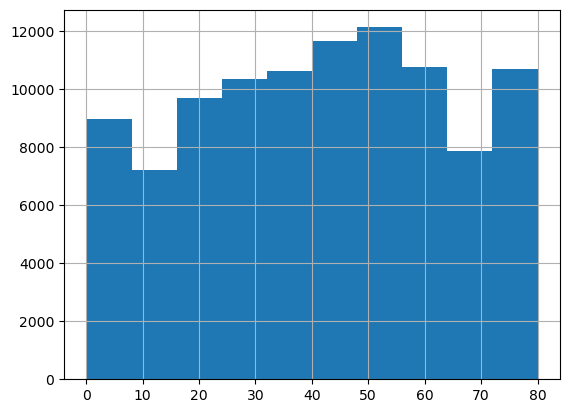

In [108]:
df['age'].hist()

In [109]:
diabetesData.groupby('diabetes').mean()

/tmp/ipykernel_4111/2057738089.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diabetesData.groupby('diabetes').mean()


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
diabetes,,,,,,
0,40.229661,0.061059,0.027176,26.901404,5.404753,132.458588
1,60.946588,0.245647,0.149059,31.988382,6.934953,194.094706


In [110]:
diabetesData.groupby('diabetes')['age'].mean()

diabetes
0    40.229661
1    60.946588
Name: age, dtype: float64

In [111]:
(40.229661+60.946588)/2

50.5881245

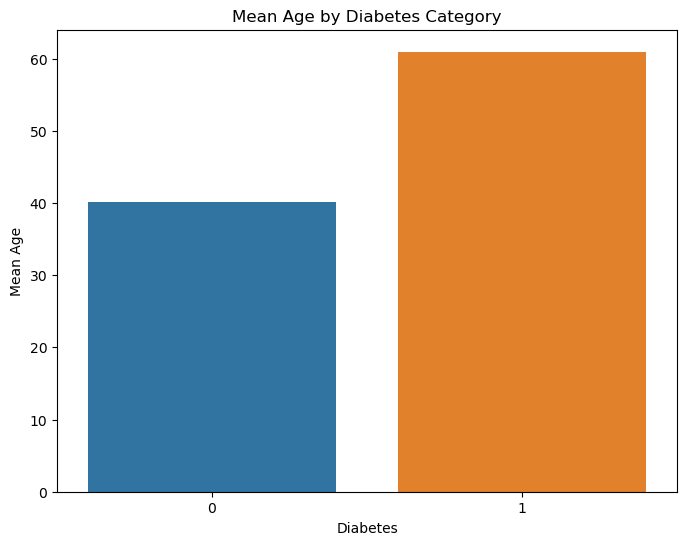

In [112]:
# Group the data by diabetes categories and calculate the mean age
grouped_data = df.groupby('diabetes')['age'].mean()

# Plot the grouped bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=grouped_data.index, y=grouped_data.values)
plt.xlabel('Diabetes')
plt.ylabel('Mean Age')
plt.title('Mean Age by Diabetes Category')
plt.show()


/tmp/ipykernel_4111/1408593337.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('diabetes').mean()


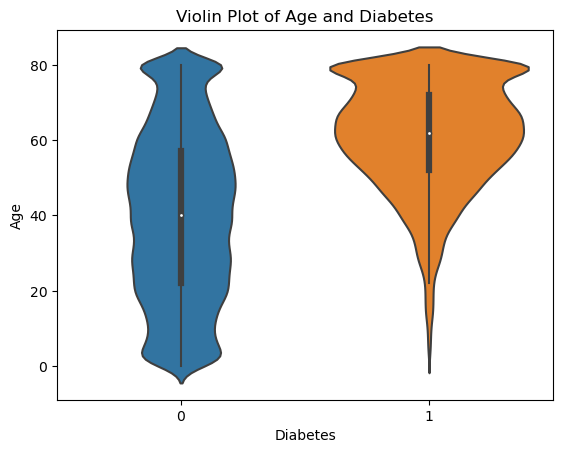

In [113]:
sns.violinplot(x = 'diabetes', y = 'age', data = df)

df.groupby('diabetes').mean()

# Set labels and title
plt.xlabel('Diabetes')
plt.ylabel('Age')
plt.title('Violin Plot of Age and Diabetes')

# Show the plot
plt.show()

In [114]:
df[df['diabetes'] == 1]['age'].describe()

count    8500.000000
mean       60.946588
std        14.549880
min         3.000000
25%        52.000000
50%        62.000000
75%        72.000000
max        80.000000
Name: age, dtype: float64

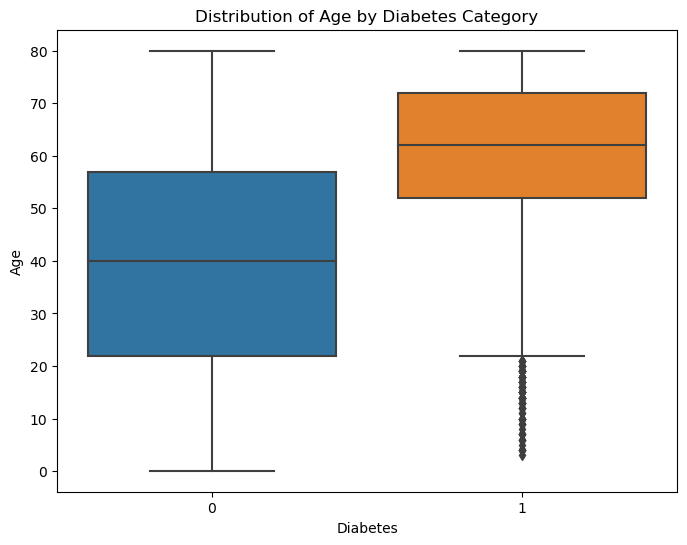

In [115]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='diabetes', y='age', data=df)
plt.xlabel('Diabetes')
plt.ylabel('Age')
plt.title('Distribution of Age by Diabetes Category')
plt.show()


In [116]:
df[(df['diabetes'] == 1) & (df['age'] < 18)]

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
1907,Female,13.0,0,0,No Info,27.32,8.2,160,1
3052,Female,10.0,0,0,No Info,20.33,6.6,240,1
5092,Female,4.0,0,0,No Info,14.99,6.5,260,1
5646,Female,14.0,0,0,current,24.29,7.0,155,1
6566,Female,9.0,0,0,never,16.00,6.1,200,1
...,...,...,...,...,...,...,...,...,...
96892,Female,14.0,0,0,No Info,18.43,6.5,159,1
97268,Male,9.0,0,0,never,16.09,6.8,260,1
98437,Female,17.0,0,0,never,26.52,8.2,300,1
98547,Male,14.0,0,0,never,24.25,6.6,160,1


In [117]:
df[(df['diabetes'] == 1) & (df['HbA1c_level'] < 6.5)]

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
38,Male,50.0,1,0,current,27.32,5.7,260,1
87,Female,36.0,0,0,current,32.27,6.2,220,1
96,Female,67.0,0,0,never,27.32,6.2,159,1
253,Female,64.0,0,0,never,27.32,6.2,155,1
254,Male,63.0,1,0,ever,35.06,5.8,200,1
...,...,...,...,...,...,...,...,...,...
99767,Female,70.0,0,0,current,22.15,6.0,240,1
99854,Female,71.0,0,0,never,32.00,5.8,155,1
99867,Male,64.0,1,0,former,33.12,5.7,300,1
99938,Male,55.0,0,1,former,30.42,6.2,300,1


In [118]:
df[df['bmi'] > 60]

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
59,Female,67.0,0,0,never,63.48,8.8,155,1
562,Male,43.0,0,0,never,69.37,7.5,130,1
618,Female,59.0,0,1,never,60.26,8.8,145,1
1395,Female,60.0,1,0,current,60.20,7.0,200,1
2072,Male,18.0,0,0,current,65.93,6.0,200,0
...,...,...,...,...,...,...,...,...,...
96066,Male,80.0,0,0,never,88.76,6.2,140,0
96673,Female,38.0,0,0,never,64.26,6.2,100,0
96771,Female,25.0,0,0,never,64.27,4.5,126,0
97217,Female,71.0,0,0,No Info,64.80,9.0,280,1


In [119]:
diabetesData.groupby('hypertension').mean()

/tmp/ipykernel_4111/4256840974.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diabetesData.groupby('hypertension').mean()


,age,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
hypertension,,,,,,
0,48.224006,0.075662,28.958578,6.083610,159.902939,0.445494
1,63.640199,0.156885,32.129793,6.645992,181.902570,0.800921


In [120]:
diabetesData[diabetesData["diabetes"] == 0]['age'].mean()

40.229661176470586

In [121]:
diabetesData[diabetesData["diabetes"] == 1]['age'].mean()

60.946588235294115

In [122]:
print(diabetesData.mean())

age                     50.588125
hypertension             0.153353
heart_disease            0.088118
bmi                     29.444893
HbA1c_level              6.169853
blood_glucose_level    163.276647
diabetes                 0.500000
dtype: float64


/tmp/ipykernel_4111/963151173.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(diabetesData.mean())


In [123]:
diabetesData[diabetesData["diabetes"] == 0]['age'].mean()

40.229661176470586

In [124]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [125]:
df[df['diabetes'] == 1]['age'].describe()

count    8500.000000
mean       60.946588
std        14.549880
min         3.000000
25%        52.000000
50%        62.000000
75%        72.000000
max        80.000000
Name: age, dtype: float64

In [126]:
df['age_group'] = pd.cut(x = df['age'], bins = [0,52,62,80], labels = ['young','middle aged','old'])
df

/tmp/ipykernel_4111/1351111976.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age_group'] = pd.cut(x = df['age'], bins = [0,52,62,80], labels = ['young','middle aged','old'])


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,age_group
0,Female,80.0,0,1,never,25.19,6.6,140,0,old
1,Female,54.0,0,0,No Info,27.32,6.6,80,0,middle aged
2,Male,28.0,0,0,never,27.32,5.7,158,0,young
3,Female,36.0,0,0,current,23.45,5.0,155,0,young
4,Male,76.0,1,1,current,20.14,4.8,155,0,old
...,...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0,old
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0,young
99997,Male,66.0,0,0,former,27.83,5.7,155,0,old
99998,Female,24.0,0,0,never,35.42,4.0,100,0,young


In [127]:
diabetesData = df.copy()

In [128]:
np.random.seed(42)
diabetesData = CreateBalancedDF(diabetesData, "diabetes");
diabetesData

/tmp/ipykernel_4111/1837343518.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDataFrame = newDataFrame.append(dataFrame.head(len(newDataFrame)))


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,age_group
0,Female,71.0,0,0,former,19.04,4.8,200,0,old
1,Female,41.0,0,0,current,27.32,4.8,200,0,young
2,Male,70.0,0,0,not current,40.15,6.6,155,1,old
3,Female,39.0,0,0,never,26.09,3.5,90,0,young
4,Male,53.0,0,0,current,39.17,6.2,80,0,middle aged
...,...,...,...,...,...,...,...,...,...,...
16995,Female,61.0,0,1,ever,31.63,6.5,200,1,middle aged
16996,Female,80.0,0,0,No Info,27.32,6.5,240,1,old
16997,Female,39.0,1,0,never,32.39,6.0,300,1,young
16998,Male,19.0,0,0,never,22.07,6.6,145,1,young


In [129]:
diabetesData

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,age_group
0,Female,71.0,0,0,former,19.04,4.8,200,0,old
1,Female,41.0,0,0,current,27.32,4.8,200,0,young
2,Male,70.0,0,0,not current,40.15,6.6,155,1,old
3,Female,39.0,0,0,never,26.09,3.5,90,0,young
4,Male,53.0,0,0,current,39.17,6.2,80,0,middle aged
...,...,...,...,...,...,...,...,...,...,...
16995,Female,61.0,0,1,ever,31.63,6.5,200,1,middle aged
16996,Female,80.0,0,0,No Info,27.32,6.5,240,1,old
16997,Female,39.0,1,0,never,32.39,6.0,300,1,young
16998,Male,19.0,0,0,never,22.07,6.6,145,1,young


In [130]:
# Train new model with a balanced dataset
np.random.seed(42)
X = diabetesData.drop(["diabetes","smoking_history"], axis = 1)
y = diabetesData["diabetes"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

transformedColumns = ["gender","age_group"]

OneHotEncoderTransformer = ColumnTransformer(transformers = [("OneHotEncoder",
                                                             OneHotEncoder(),
                                                             transformedColumns)], 
                                                             remainder = 'passthrough')

param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
    'class_weight' : ["balanced"]
}

RandomForestModel = RandomizedSearchCV(estimator = RandomForestClassifier(), 
                                        param_distributions = param_grid, 
                                        n_iter = 100, 
                                        n_jobs = 12)

rf_model_tuned_2 = Pipeline(steps = [("Encoder",OneHotEncoderTransformer),
                                   ("RandomForestClassifier",RandomForestModel)])

rf_model_tuned_2.fit(X_train, y_train)
y_preds = rf_model_tuned_2.predict(X_test)
rf_model_report_tuned_2 = classification_report(y_true = y_test, y_pred = y_preds)
print(rf_model_tuned_2.score(X_test, y_test))
print(rf_model_report_tuned_2)

0.9002941176470588
              precision    recall  f1-score   support

           0       0.92      0.88      0.90      1699
           1       0.88      0.92      0.90      1701

    accuracy                           0.90      3400
   macro avg       0.90      0.90      0.90      3400
weighted avg       0.90      0.90      0.90      3400



In [131]:
# Train new model with a balanced dataset
np.random.seed(42)
X = diabetesData.drop(["diabetes","smoking_history","age"], axis = 1)
y = diabetesData["diabetes"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

transformedColumns = ["gender","age_group"]

OneHotEncoderTransformer = ColumnTransformer(transformers = [("OneHotEncoder",
                                                             OneHotEncoder(),
                                                             transformedColumns)], 
                                                             remainder = 'passthrough')

param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
    'class_weight' : ["balanced"]
}

RandomForestModel = RandomizedSearchCV(estimator = RandomForestClassifier(), 
                                        param_distributions = param_grid, 
                                        n_iter = 100, 
                                        n_jobs = 12)

rf_model_tuned_3 = Pipeline(steps = [("Encoder",OneHotEncoderTransformer),
                                   ("RandomForestClassifier",RandomForestModel)])

rf_model_tuned_3.fit(X_train, y_train)
y_preds = rf_model_tuned_3.predict(X_test)
rf_model_report_tuned_3 = classification_report(y_true = y_test, y_pred = y_preds)
print(rf_model_tuned_3.score(X_test, y_test))
print(rf_model_report_tuned_3)

0.8985294117647059
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1699
           1       0.90      0.90      0.90      1701

    accuracy                           0.90      3400
   macro avg       0.90      0.90      0.90      3400
weighted avg       0.90      0.90      0.90      3400



In [132]:
X_train['age_group']

4679             old
2512           young
993              old
1327             old
4630             old
            ...     
11284          young
11964          young
5390     middle aged
860              old
15795            old
Name: age_group, Length: 13600, dtype: category
Categories (3, object): ['young' < 'middle aged' < 'old']

In [133]:
df[df['diabetes'] == 1]['age'].describe()

count    8500.000000
mean       60.946588
std        14.549880
min         3.000000
25%        52.000000
50%        62.000000
75%        72.000000
max        80.000000
Name: age, dtype: float64

In [134]:
df[df['diabetes'] == 1]['age'].describe()

count    8500.000000
mean       60.946588
std        14.549880
min         3.000000
25%        52.000000
50%        62.000000
75%        72.000000
max        80.000000
Name: age, dtype: float64

In [135]:
# Train new model with a balanced dataset
np.random.seed(42)
X = diabetesData.drop(["diabetes","smoking_history","age"], axis = 1)
y = diabetesData["diabetes"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

OrdinalEncoderColumns = ["age_group","gender"]


OrdinalEncoderTransformer = ColumnTransformer(transformers = [("OrdinalEncoder",
                                                             OrdinalEncoder(),
                                                             OrdinalEncoderColumns)], 
                                                             remainder = 'passthrough')

param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
    'class_weight' : ["balanced"]
}

RandomForestModel = RandomizedSearchCV(estimator = RandomForestClassifier(), 
                                        param_distributions = param_grid, 
                                        n_iter = 100, 
                                        n_jobs = 20)

rf_model_tuned_4 = Pipeline(steps = [("Encoder",OrdinalEncoderTransformer),
                                   ("RandomForestClassifier",RandomForestModel)])

rf_model_tuned_4.fit(X_train, y_train)
y_preds = rf_model_tuned_4.predict(X_test)
rf_model_report_tuned_4 = classification_report(y_true = y_test, y_pred = y_preds)
print(rf_model_tuned_4.score(X_test, y_test))
print(rf_model_report_tuned_4)

0.8973529411764706
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      1699
           1       0.93      0.86      0.89      1701

    accuracy                           0.90      3400
   macro avg       0.90      0.90      0.90      3400
weighted avg       0.90      0.90      0.90      3400



In [136]:
# Train new model with a balanced dataset
np.random.seed(42)
X = diabetesData.drop(["diabetes","smoking_history","age"], axis = 1)
y = diabetesData["diabetes"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

OneHotEncoderColumns = ["gender"]

OrdinalEncoderColumns = ["age_group"]

EncoderTransformer = ColumnTransformer(transformers = [("OneHotEncoder",
                                                        OneHotEncoder(),
                                                        OneHotEncoderColumns),
                                                       ("OrdinalEncoder",
                                                        OrdinalEncoder(
                                                           categories=[['young', 'middle aged', 'old']]
                                                        ),
                                                        OrdinalEncoderColumns)], 
                                                        remainder = 'passthrough')


param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
    'class_weight' : ["balanced"]
}

RandomForestModel = RandomizedSearchCV(estimator = RandomForestClassifier(), 
                                        param_distributions = param_grid, 
                                        n_iter = 100, 
                                        n_jobs = 20)

rf_model_tuned_5 = Pipeline(steps = [("EncoderTransformer",EncoderTransformer),
                                     ("RandomForestClassifier",RandomForestModel)])

rf_model_tuned_5.fit(X_train, y_train)
y_preds = rf_model_tuned_5.predict(X_test)
rf_model_report_tuned_5 = classification_report(y_true = y_test, y_pred = y_preds)
print(rf_model_tuned_5.score(X_test, y_test))
print(rf_model_report_tuned_5)

0.9035294117647059
              precision    recall  f1-score   support

           0       0.90      0.91      0.90      1699
           1       0.91      0.89      0.90      1701

    accuracy                           0.90      3400
   macro avg       0.90      0.90      0.90      3400
weighted avg       0.90      0.90      0.90      3400



In [137]:
# Train new model with a balanced dataset
np.random.seed(42)
X = diabetesData.drop(["diabetes","smoking_history","age"], axis = 1)
y = diabetesData["diabetes"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

OneHotEncoderColumns = ["gender"]

OrdinalEncoderColumns = ["age_group"]

EncoderTransformer = ColumnTransformer(transformers = [("OneHotEncoder",
                                                        OneHotEncoder(),
                                                        OneHotEncoderColumns),
                                                       ("OrdinalEncoder",
                                                        OrdinalEncoder(
                                                           categories=[['young', 'middle aged', 'old']]
                                                        ),
                                                        OrdinalEncoderColumns)], 
                                                        remainder = 'passthrough')


param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
    'class_weight' : ["balanced"]
}

RandomForestModel = RandomizedSearchCV(estimator = RandomForestClassifier(), 
                                        param_distributions = param_grid, 
                                        n_iter = 100, 
                                        n_jobs = 20)

rf_model_tuned_6 = Pipeline(steps = [("EncoderTransformer",EncoderTransformer),
                                     ("Scaler",MinMaxScaler()),
                                     ("RandomForestClassifier",RandomForestModel)])

rf_model_tuned_6.fit(X_train, y_train)
y_preds = rf_model_tuned_6.predict(X_test)
rf_model_report_tuned_6 = classification_report(y_true = y_test, y_pred = y_preds)
print(rf_model_tuned_6.score(X_test, y_test))
print(rf_model_report_tuned_6)

0.903235294117647
              precision    recall  f1-score   support

           0       0.90      0.91      0.90      1699
           1       0.91      0.89      0.90      1701

    accuracy                           0.90      3400
   macro avg       0.90      0.90      0.90      3400
weighted avg       0.90      0.90      0.90      3400



In [138]:
X_train

,gender,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,age_group
4679,Male,0,0,26.53,8.8,145,old
2512,Female,0,0,24.23,4.5,155,young
993,Male,0,0,24.19,6.5,200,old
1327,Female,0,0,26.87,5.8,140,old
4630,Male,0,0,40.03,9.0,200,old
...,...,...,...,...,...,...,...
11284,Male,0,0,21.43,5.8,140,young
11964,Male,0,0,27.32,6.2,200,young
5390,Male,0,0,32.55,6.0,260,middle aged
860,Male,0,1,41.81,6.8,126,old


In [139]:
X_train_testing = EncoderTransformer.fit_transform(X_train)
X_train_testing

array([[  0.  ,   1.  ,   2.  , ...,  26.53,   8.8 , 145.  ],
       [  1.  ,   0.  ,   0.  , ...,  24.23,   4.5 , 155.  ],
       [  0.  ,   1.  ,   2.  , ...,  24.19,   6.5 , 200.  ],
       ...,
       [  0.  ,   1.  ,   1.  , ...,  32.55,   6.  , 260.  ],
       [  0.  ,   1.  ,   2.  , ...,  41.81,   6.8 , 126.  ],
       [  0.  ,   1.  ,   2.  , ...,  24.43,   7.5 , 300.  ]])

In [140]:
EncoderTransformer.get_feature_names_out()

array(['OneHotEncoder__gender_Female', 'OneHotEncoder__gender_Male',
       'OrdinalEncoder__age_group', 'remainder__hypertension',
       'remainder__heart_disease', 'remainder__bmi',
       'remainder__HbA1c_level', 'remainder__blood_glucose_level'],
      dtype=object)

In [141]:
X_train

,gender,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,age_group
4679,Male,0,0,26.53,8.8,145,old
2512,Female,0,0,24.23,4.5,155,young
993,Male,0,0,24.19,6.5,200,old
1327,Female,0,0,26.87,5.8,140,old
4630,Male,0,0,40.03,9.0,200,old
...,...,...,...,...,...,...,...
11284,Male,0,0,21.43,5.8,140,young
11964,Male,0,0,27.32,6.2,200,young
5390,Male,0,0,32.55,6.0,260,middle aged
860,Male,0,1,41.81,6.8,126,old


In [142]:
X_train_testing = pd.DataFrame(X_train_testing, columns = ['OneHotEncoder__gender_Female', 'OneHotEncoder__gender_Male',
       'OrdinalEncoder__age_group', 'remainder__hypertension',
       'remainder__heart_disease', 'remainder__bmi',
       'remainder__HbA1c_level', 'remainder__blood_glucose_level'])
X_train_testing

,OneHotEncoder__gender_Female,OneHotEncoder__gender_Male,OrdinalEncoder__age_group,remainder__hypertension,remainder__heart_disease,remainder__bmi,remainder__HbA1c_level,remainder__blood_glucose_level
0,0.0,1.0,2.0,0.0,0.0,26.53,8.8,145.0
1,1.0,0.0,0.0,0.0,0.0,24.23,4.5,155.0
2,0.0,1.0,2.0,0.0,0.0,24.19,6.5,200.0
3,1.0,0.0,2.0,0.0,0.0,26.87,5.8,140.0
4,0.0,1.0,2.0,0.0,0.0,40.03,9.0,200.0
...,...,...,...,...,...,...,...,...
13595,0.0,1.0,0.0,0.0,0.0,21.43,5.8,140.0
13596,0.0,1.0,0.0,0.0,0.0,27.32,6.2,200.0
13597,0.0,1.0,1.0,0.0,0.0,32.55,6.0,260.0
13598,0.0,1.0,2.0,0.0,1.0,41.81,6.8,126.0


In [143]:
# Train new model with a balanced dataset
np.random.seed(42)
X = diabetesData.drop(["diabetes","smoking_history","age"], axis = 1)
y = diabetesData["diabetes"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

OneHotEncoderColumns = ["gender"]

OrdinalEncoderColumns = ["age_group"]

EncoderTransformer = ColumnTransformer(transformers = [("OneHotEncoder",
                                                        OneHotEncoder(),
                                                        OneHotEncoderColumns),
                                                       ("OrdinalEncoder",
                                                        OrdinalEncoder(
                                                           categories=[['young', 'middle aged', 'old']]
                                                        ),
                                                        OrdinalEncoderColumns)], 
                                                        remainder = 'passthrough')


param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
    'class_weight' : ["balanced"]
}

RandomForestModel = RandomizedSearchCV(estimator = RandomForestClassifier(), 
                                        param_distributions = param_grid, 
                                        n_iter = 100, 
                                        n_jobs = 20)

rf_model_tuned_6 = Pipeline(steps=[
    ("EncoderTransformer", EncoderTransformer),
    ("Scaler", MinMaxScaler()),
    ("RandomForestClassifier", RandomForestModel)
])


rf_model_tuned_6.fit(X_train, y_train)
y_preds = rf_model_tuned_6.predict(X_test)
rf_model_report_tuned_6 = classification_report(y_true = y_test, y_pred = y_preds)
print(rf_model_tuned_6.score(X_test, y_test))
print(rf_model_report_tuned_6)

0.9014705882352941
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      1699
           1       0.92      0.88      0.90      1701

    accuracy                           0.90      3400
   macro avg       0.90      0.90      0.90      3400
weighted avg       0.90      0.90      0.90      3400

